## Загрузка датасета

In [145]:
import pandas as pd
import numpy as np

In [146]:
HABR_DATASET_PATH = 'habr.xlsx'
df = pd.read_excel(HABR_DATASET_PATH)

In [147]:
df

,Unnamed: 0,Ссылка на объявление,Дата размещения,Название,Зарплата от,Зарплата до,Валюта,Вакансия,Стаж,Требования,Город,Тип занятости,Можно удаленно,Описание,Работодатель,Ссылка на работодателя,Рейтинг,Офисы,Число сотрудников,Дата сбора данных
0,0,https://career.habr.com/vacancies/1000129552,01-04-2024 16:48:58,ИТ-редактор,40000.0,60000.0,₽,Копирайтер,Стажёр (Intern),Грамотность / Русский язык / Английский язык,NaN,Неполный рабочий день,1.0,~~~ О компании и команде\nМы готовим технологи...,Glyph media,https://glph.media,NaN,"Россия, Москва, пер. Токмаков, д.20/31, стр. 1",0,01-04-2024 20:35:58
1,1,https://career.habr.com/vacancies/1000138286,06-03-2024 10:31:40,Руководитель отдела разработки / CTO,300000.0,NaN,₽,Технический директор,NaN,Ведущий (Lead) / Linux / C# / .NET / WPF / Раз...,Пермь,Полный рабочий день,NaN,"~~~ О компании и команде\nМы – Macroscop, прод...",Macroscop,http://macroscop.com/,NaN,"Россия, Пермь, ш. Космонавтов, д. 111, корп. 27",4,01-04-2024 20:35:58
2,2,https://career.habr.com/vacancies/1000134771,20-03-2024 09:37:27,Программист 1С,NaN,NaN,NaN,Программист 1С,Средний (Middle),Разработка под 1С,NaN,Полный рабочий день,1.0,~~~ О компании и команде\nАктивно развивающаяс...,ПартКом,http://www.part-kom.ru/,NaN,"Россия, Нижний Новгород, ул. Гаражная, д.9",8,01-04-2024 20:35:58
3,3,https://career.habr.com/vacancies/1000138674,27-03-2024 13:07:52,UX/UI дизайнер удаленно middle - senior,NaN,4000.0,$,UI/UX дизайнер,Средний (Middle),Figma Design / Adobe Photoshop / UI/UX дизайн ...,NaN,Полный рабочий день,1.0,~~~ О компании и команде\nПривет! Приглашаем п...,IT Force,https://itforce.io/,NaN,"Россия, Москва, 1-й Красногвардейский пр.",2,01-04-2024 20:35:59
4,4,https://career.habr.com/vacancies/1000105132,31-03-2024 18:25:07,Разработчик ETL,NaN,NaN,NaN,Разработчик баз данных,Средний (Middle),SQL / PostgreSQL / ETL,"Москва, Санкт-Петербург",Полный рабочий день,1.0,~~~ О компании и команде\nBell Integrator – од...,Bell Integrator,http://www.bellintegrator.ru,4.68,"Беларусь, Минск, Беларусь, Минск, ул. Фабрициу...",288,01-04-2024 20:35:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3333,3333,https://career.habr.com/vacancies/1000128235,27-03-2024 15:27:14,Системный аналитик 1С,NaN,NaN,NaN,Системный аналитик,Старший (Senior),Разработка ТЗ / Agile / Автоматизация процессо...,"Воронеж, Краснодар, Ярославль",Полный рабочий день,NaN,~~~ О компании и команде\nПроект: Кредитный ко...,Совкомбанк Технологии,https://sovcombank.it/,4.69,NaN,205,01-04-2024 20:59:00
3334,3334,https://career.habr.com/vacancies/1000140564,26-03-2024 19:17:27,Middle Golang разработчик [Финтех продукт],NaN,NaN,NaN,Бэкенд разработчик,Средний (Middle),Redis / Golang / PostgreSQL / GraphQL / gRPC,NaN,Полный рабочий день,1.0,~~~ О компании и команде\nМТС Digital – единый...,МТС,http://mts.ru,NaN,"Россия, Москва, пр-т Андропова, д. 18, корп. 9...",607,01-04-2024 20:58:58
3335,3335,https://career.habr.com/vacancies/1000133157,24-03-2024 14:27:33,Системный программист С,NaN,NaN,NaN,Десктоп разработчик,Средний (Middle),C / Linux / Python / Bash,NaN,Полный рабочий день,1.0,~~~ О компании и команде\nМы Группа Астра – од...,Группа Астра,https://astralinux.ru/,4.72,"Россия, Москва, Варшавское ш., д. 26",51,01-04-2024 20:59:01
3336,3336,https://career.habr.com/vacancies/1000140411,27-03-2024 15:50:28,QA Engineer (Mobile),NaN,NaN,NaN,Инженер по ручному тестированию,NaN,SOAP / SQL / Тестирование мобильных приложений...,Москва,NaN,1.0,~~~ О компании и команде\nBELL INTEGRATOR – кр...,Bell Integrator,http://www.bellintegrator.ru,4.68,"Беларусь, Минск, Беларусь, Минск, ул. Фабрициу...",288,01-04-2024 20:58:59


## Выброс ненужных строк и столбцов

In [148]:
df.isna().sum()

Unnamed: 0                   0
Ссылка на объявление         0
Дата размещения              0
Название                     0
Зарплата от               2846
Зарплата до               2903
Валюта                    2693
Вакансия                     0
Стаж                       785
Требования                   0
Город                     1036
Тип занятости              300
Можно удаленно            1274
Описание                     0
Работодатель                 0
Ссылка на работодателя       0
Рейтинг                   1336
Офисы                      365
Число сотрудников            0
Дата сбора данных            0
dtype: int64

In [149]:
df.columns

Index(['Unnamed: 0', 'Ссылка на объявление', 'Дата размещения', 'Название',
       'Зарплата от', 'Зарплата до', 'Валюта', 'Вакансия', 'Стаж',
       'Требования', 'Город', 'Тип занятости', 'Можно удаленно', 'Описание',
       'Работодатель', 'Ссылка на работодателя', 'Рейтинг', 'Офисы',
       'Число сотрудников', 'Дата сбора данных'],
      dtype='object')

In [150]:
def get_valide_cols(dataset, cols):
    return dataset[cols]

In [151]:
valide_cols = [
    'Дата размещения',
    'Вакансия',
    'Стаж',
    'Зарплата от',
    'Зарплата до',
    'Город',
    'Дата сбора данных',
    'Число сотрудников',
    'Тип занятости',
    'Можно удаленно',
]

In [152]:
exchange_rate_template = {
    "₽": 1,
    "$": 92.37,
    "€": 99.53,
    "₸": 0.206
}

In [153]:
def apply_exchange_rate(row, template=exchange_rate_template):
    row["Зарплата от"] = row["Зарплата от"] * exchange_rate_template[row["Валюта"]] if pd.notna(row["Зарплата от"]) else np.nan
    row["Зарплата до"] = row["Зарплата до"] * exchange_rate_template[row["Валюта"]] if pd.notna(row["Зарплата до"]) else np.nan
    return row

In [154]:
def get_difference_percentiles(df):
    filtered_df = df.dropna(subset=['Зарплата от', 'Зарплата до']).copy()
    filtered_df['Разница'] = filtered_df['Зарплата до'] - filtered_df['Зарплата от']
    condition = filtered_df['Разница'] > 0.8 * filtered_df['Зарплата до']
    filtered_df.loc[condition, ['Зарплата от', 'Разница']] = np.nan

    filtered_df = filtered_df.dropna(subset=['Зарплата от', 'Зарплата до'])

    filtered_df = filtered_df[filtered_df['Зарплата от'] >= 1000]
    filtered_df = filtered_df[filtered_df['Зарплата до'] >= 10000]

    filtered_df['Коэффициент разницы'] = np.where(filtered_df['Зарплата до'] != 0,
                                                      filtered_df['Разница'] / filtered_df['Зарплата до'],
                                                      np.nan)

    perc25 = filtered_df['Коэффициент разницы'].quantile(0.25)
    perc50 = filtered_df['Коэффициент разницы'].quantile(0.50)
    perc75 = filtered_df['Коэффициент разницы'].quantile(0.75)

    return perc25, perc50, perc75


def fill_na_salary(df, coef):
    result_df = df.copy()
    result_df['Зарплата до'] = result_df['Зарплата до'].fillna(result_df['Зарплата от'] / (1-coef))
    result_df['Зарплата от'] = result_df['Зарплата от'].fillna(result_df['Зарплата до'] * (1-coef))
    return result_df

Удаляем строки, в которых одновременно отсутствует информация о зарплате в обоих столбцах. Заменяем пропуски нулями и делаем столбец категориальным. Заполняем столбец "Город"

In [155]:
def preprocessing_data(df):
   df_new = df.copy()

   missing_data = df_new[df["Зарплата от"].isnull() & df_new["Зарплата до"].isnull()]
   df_new = df_new.drop(missing_data.index)

   df_new['Можно удаленно'].fillna(0, inplace=True)
   df_new['Можно удаленно'] = df_new['Можно удаленно'].astype('category')

   df_new.loc[(df_new['Можно удаленно']==0) & (df_new['Город'].isnull()), 'Город'] = 'Не указано'
   df_new.loc[(df_new['Можно удаленно']==1) & (df_new['Город'].isnull()), 'Город'] = 'Удаленно'

   df = df.apply(apply_exchange_rate, axis=1)
   df.drop("Валюта", axis=1, inplace=True)

   perc25, perc50, perc75 = get_difference_percentiles(df)
   df_25 = fill_na_salary(df, perc25)

   get_valide_cols(df_new, valide_cols)

   return df_new

In [156]:
df = preprocessing_data(df)

In [158]:
df.isna().sum()

Unnamed: 0                  0
Ссылка на объявление        0
Дата размещения             0
Название                    0
Зарплата от               153
Зарплата до               210
Валюта                      0
Вакансия                    0
Стаж                      102
Требования                  0
Город                       0
Тип занятости              35
Можно удаленно              0
Описание                    0
Работодатель                0
Ссылка на работодателя      0
Рейтинг                   465
Офисы                     129
Число сотрудников           0
Дата сбора данных           0
dtype: int64

## Распределение городов

In [159]:
import re

def separate_cities(df):
  df_new = pd.DataFrame()
  for index in range(df.shape[0]):
    row = re.sub("[\(\[].*?[\)\]]", "", df['Город'].iloc[index])
    cities = [city.lstrip().rstrip() for city in row.split(',')]
    init_row = df.iloc[index].copy()
    for city in cities:
      new_row = init_row.copy()
      new_row['Город'] = city
      df_new = pd.concat([df_new, pd.DataFrame([new_row])], ignore_index=True)
  return df_new

In [160]:
import matplotlib.pyplot as plt

# выбираем такое число городов, доля которых в датасете находится около определенного процента thershold
def find_cities_around_threshold(df, threshold=75):
  labels = df['Город'].value_counts(dropna = False, ascending=True).keys()
  data = df['Город'].value_counts(dropna = False, ascending=True)

  wedges, texts, autotexts = plt.pie(data, labels=labels, autopct='%1.1f%%')

  all_percentage = 0
  cities = list(labels)
  for label, pct_label in zip(texts, autotexts):
      pct_value = pct_label.get_text().rstrip('%')
      all_percentage += float(pct_value)
      if all_percentage < 100 - threshold:
          cities.remove(label.get_text())
          label.set_text('')
          pct_label.set_text('')
  return cities

In [161]:
def create_new_cities(df, cities):
  for index in range(df.shape[0]):
    if (df.iloc[index]['Город'] not in cities):
      df.at[index, 'Город'] = 'малый город'
  return df

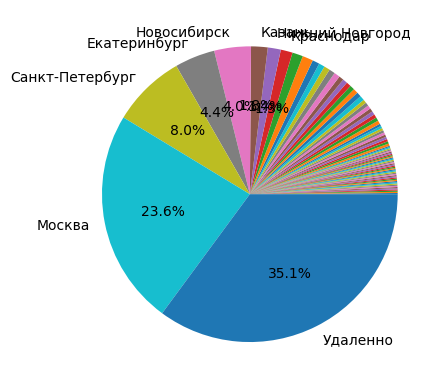

In [162]:
df_new = separate_cities(df)
cities = find_cities_around_threshold(df_new, 80)
df_new = create_new_cities(df_new, cities)

In [163]:
df_new['Город'].unique()

array(['Удаленно', 'малый город', 'Москва', 'Санкт-Петербург',
       'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород',
       'Краснодар'], dtype=object)

In [164]:
df['Требования'].value_counts()

Требования
Разработка под 1С                                                                                          10
SAP                                                                                                         8
Ведущий (Lead) / Java / Java Spring Framework / Hibernate / SQL / Управление разработкой                    3
Техническая поддержка                                                                                       3
Ведущий (Lead) / Java / Java Spring Framework                                                               3
                                                                                                           ..
Docker / REST / Python / Git / PostgreSQL / Базы данных / ООП                                               1
SQL / UML / Системный анализ / BPMN / Анализ требований / Системная аналитика / Базы данных / Waterfall     1
PHP / Laravel / SQL / ООП                                                                                   1